In [59]:
from warnings import filterwarnings
filterwarnings('ignore')

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# data operations

In [35]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [37]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


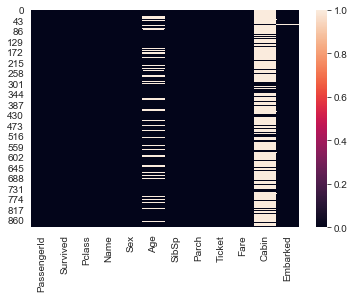

In [38]:
sns.heatmap(train_data.isnull())

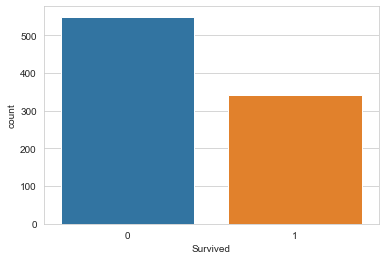

In [39]:
sns.countplot(x='Survived', data=train_data)

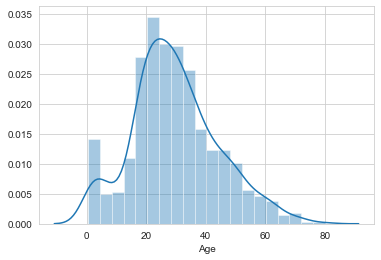

In [40]:
sns.distplot(train_data['Age'].dropna())

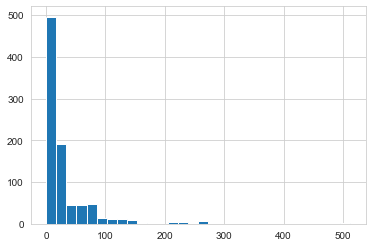

In [41]:
train_data['Fare'].hist(bins=30)

In [42]:
train_data['Age']= train_data[['Age']].fillna(value=train_data['Age'].mean())

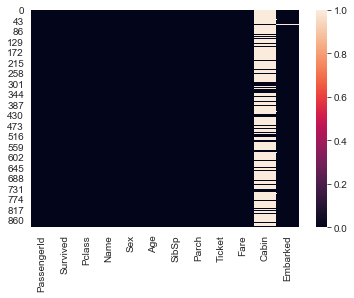

In [43]:
sns.heatmap(train_data.isnull())

In [44]:
train_data= train_data.drop(['Cabin','PassengerId','Name','Ticket'], axis=1)

In [45]:
sex=pd.get_dummies(train_data['Sex'], drop_first=True)
embarked= pd.get_dummies(train_data['Embarked'], drop_first=True)

In [46]:
train_data.drop(['Sex','Embarked'], axis=1,inplace=True)

In [47]:
train_data=pd.concat([train_data,sex,embarked], axis=1)

In [48]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [49]:
from sklearn.model_selection import train_test_split
X=train_data.drop(['Survived'], axis=1)
y=train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=42)

((891, 8), (891,), (418, 10))

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [54]:
rf_model 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
from sklearn.metrics import accuracy_score #works
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7985074626865671

In [57]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [60]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [61]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.6min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [62]:
print("Best Params: " + str(rf_cv_model.best_params_))

Best Params: {'max_depth': 8, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 1000}


In [64]:
rf_tuned = RandomForestClassifier(max_depth = 8, 
                                  max_features = 2, 
                                  min_samples_split = 2,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8134328358208955

In [68]:
filter_test_data=test_data.drop(['Cabin','PassengerId','Name','Ticket'], axis=1)


In [69]:
filter_test_data['Age']=filter_test_data[['Age']].fillna(value=filter_test_data['Age'].mean())
sex_test=pd.get_dummies(filter_test_data['Sex'], drop_first=True)
embarked_test= pd.get_dummies(filter_test_data['Embarked'], drop_first=True)
filter_test_data.drop(['Sex','Embarked'], axis=1,inplace=True)
filter_test_data=pd.concat([filter_test_data,sex_test,embarked_test], axis=1)

In [70]:
filter_test_data.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      1
male      0
Q         0
S         0
dtype: int64

In [71]:
filter_test_data['Fare']=filter_test_data[['Fare']].fillna(value=filter_test_data['Age'].mean())


In [73]:
final_pred=rf_tuned.predict(filter_test_data)

In [74]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": final_pred
    })
 
submission.to_csv('submission.csv', index=False)